In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [201]:
player_stats_2021_df = pd.read_csv("2021PlayerStats.csv")


In [226]:
statcast_2021_df = pd.read_csv("Statcast_2021.csv")
statcast_2021_df

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,2926,FF,2021-10-03,92.3,1.40,6.80,"Smith, Will",596019,519293,field_out,...,5,0,5,0,5,Infield shift,Strategic,148.0,0.000,-0.073
1,3048,SL,2021-10-03,80.6,1.60,6.64,"Smith, Will",596019,519293,NaN,...,5,0,5,0,5,Infield shift,Strategic,315.0,0.000,-0.027
2,3294,CU,2021-10-03,75.5,1.46,6.88,"Smith, Will",596019,519293,NaN,...,5,0,5,0,5,Infield shift,Standard,328.0,0.000,-0.020
3,3447,CU,2021-10-03,75.0,1.53,6.83,"Smith, Will",596019,519293,NaN,...,5,0,5,0,5,Standard,Standard,330.0,0.000,0.016
4,3545,FF,2021-10-03,91.2,1.49,6.66,"Smith, Will",607043,519293,field_out,...,5,0,5,0,5,Standard,Standard,143.0,0.002,-0.189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709846,3470,FF,2021-04-01,95.9,-1.92,6.15,"Márquez, Germán",605141,608566,NaN,...,0,0,0,0,0,Standard,Standard,212.0,0.000,-0.077
709847,3684,FF,2021-04-01,95.4,-1.69,6.17,"Márquez, Germán",605141,608566,NaN,...,0,0,0,0,0,Strategic,Standard,NaN,0.000,0.113
709848,3810,FF,2021-04-01,96.1,-1.76,6.27,"Márquez, Germán",605141,608566,NaN,...,0,0,0,0,0,Strategic,Standard,208.0,0.000,0.052
709849,3937,FF,2021-04-01,95.6,-2.04,6.03,"Márquez, Germán",605141,608566,NaN,...,0,0,0,0,0,Standard,Standard,195.0,0.000,-0.049


In [227]:
player_stats_2021_df = player_stats_2021_df[player_stats_2021_df["AB"] > 200]
player_stats_2021_df["AB/HR"] = player_stats_2021_df["AB"] / player_stats_2021_df["HR"]
player_stats_2021_df["AB/SO"] = player_stats_2021_df["AB"] / player_stats_2021_df["SO"]
player_stats_2021_df.describe()

,Age,G,AB,R,H,2B,3B,HR,RBI,SB,...,HBP,AVG,OBP,SLG,OPS,AB/HR,AB/SO,Power?,Contact?,Speed?
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,...,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,30.963855,114.108434,383.686747,54.623494,97.939759,19.554217,1.656627,15.219880,52.843373,5.512048,...,4.990964,0.251786,0.324855,0.426175,0.751030,inf,4.390051,0.192771,0.246988,0.039157
std,3.525293,29.861619,125.948119,24.313159,38.042701,8.718495,1.646066,9.992285,24.511533,6.489348,...,4.236574,0.032506,0.036363,0.072610,0.099593,NaN,1.563390,0.395070,0.431911,0.194260
min,22.000000,52.000000,202.000000,15.000000,30.000000,4.000000,0.000000,0.000000,5.000000,0.000000,...,0.000000,0.143000,0.220000,0.261000,0.497000,10.090909,2.209150,0.000000,0.000000,0.000000
25%,29.000000,90.000000,270.750000,35.000000,65.000000,12.000000,0.000000,7.000000,34.750000,1.000000,...,2.000000,0.230000,0.301000,0.375000,0.691000,19.435484,3.443182,0.000000,0.000000,0.000000
50%,31.000000,116.000000,369.000000,50.500000,92.000000,18.500000,1.000000,13.000000,48.000000,3.000000,...,4.000000,0.253500,0.324000,0.417000,0.740000,27.733333,4.027973,0.000000,0.000000,0.000000
75%,33.000000,141.250000,488.500000,73.000000,126.250000,26.000000,3.000000,21.250000,69.000000,8.000000,...,7.000000,0.271000,0.351000,0.471000,0.808500,41.643939,5.000000,0.000000,0.000000,0.000000
max,43.000000,162.000000,664.000000,123.000000,191.000000,42.000000,8.000000,48.000000,121.000000,40.000000,...,27.000000,0.342000,0.465000,0.647000,1.044000,inf,17.333333,1.000000,1.000000,1.000000


In [228]:
#player_stats_2021_df['Speed?'] = np.where( (player_stats_2021_df['SB'] > 15), 1, 0)
player_stats_2021_df["Power?"] = np.where((player_stats_2021_df["AB/HR"] < 18), 1 , 0)
player_stats_2021_df["Contact?"] = np.where((player_stats_2021_df["AB/SO"] > 5), 1 , 0)
player_stats_2021_df["Speed?"] = np.where((player_stats_2021_df["SB"] > 20), 1 , 0)

In [229]:
def assign_combination(row):
    if row["Power?"] == 1 & row["Contact?"] == 1:
        return "Power & Contact"
    elif row['Power?'] == 1:
        return 'Power'
    elif row['Contact?'] == 1:
        return 'Contact'
    else:
        return 'Standard'

In [230]:
player_stats_2021_df['PlayerType'] = player_stats_2021_df.apply(assign_combination, axis=1)

In [231]:
player_stats_2021_df[player_stats_2021_df["PlayerType"] == "Power & Contact"]

,Player,Team,Pos,Age,G,AB,R,H,2B,3B,...,AVG,OBP,SLG,OPS,AB/HR,AB/SO,Power?,Contact?,Speed?,PlayerType
11,Vladimir Guerrero,TOR,1B,24,161,604,123,188,29,1,...,0.311,0.401,0.601,1.002,12.583333,5.490909,1,1,0,Power & Contact
18,Nolan Arenado,STL,3B,32,157,593,81,151,34,3,...,0.255,0.312,0.494,0.806,17.441176,6.177083,1,1,0,Power & Contact
38,Jose Ramirez,CLE,3B,31,152,552,111,147,32,5,...,0.266,0.355,0.538,0.893,15.333333,6.344828,1,1,1,Power & Contact
71,Kyle Tucker,HOU,OF,26,140,506,83,149,37,3,...,0.294,0.359,0.557,0.916,16.866667,5.622222,1,1,0,Power & Contact
73,Juan Soto,WAS,OF,25,151,502,111,157,20,2,...,0.313,0.465,0.534,0.999,17.310345,5.397849,1,1,0,Power & Contact
128,Jesse Winker,CIN,OF,30,110,423,77,129,32,1,...,0.305,0.394,0.556,0.950,17.625000,5.640000,1,1,0,Power & Contact
297,Frank Schwindel,CHC,1B,31,56,222,42,76,19,1,...,0.342,0.389,0.613,1.002,17.076923,6.166667,1,1,0,Power & Contact


In [232]:
player_stats_2021_df[player_stats_2021_df["PlayerType"] == "Contact"]

,Player,Team,Pos,Age,G,AB,R,H,2B,3B,...,AVG,OBP,SLG,OPS,AB/HR,AB/SO,Power?,Contact?,Speed?,PlayerType
0,Whit Merrifield,KC,2B,34,162,664,97,184,42,3,...,0.277,0.317,0.395,0.712,66.400000,6.446602,0,1,1,Contact
2,Tommy Edman,STL,2B,28,159,641,91,168,41,3,...,0.262,0.308,0.387,0.695,58.272727,6.747368,0,1,1,Contact
4,Isiah Kiner-Falefa,TEX,OF,28,158,635,74,172,25,3,...,0.271,0.312,0.357,0.669,79.375000,7.055556,0,1,0,Contact
6,David Fletcher,LAA,2B,29,157,626,74,164,27,3,...,0.262,0.297,0.324,0.621,313.000000,10.433333,0,1,0,Contact
10,J.P. Crawford,SEA,SS,28,160,619,89,169,37,0,...,0.273,0.338,0.376,0.714,68.777778,5.429825,0,1,0,Contact
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,Tommy La Stella,SF,DH,34,76,220,26,55,11,1,...,0.250,0.308,0.405,0.713,31.428571,8.461538,0,1,0,Contact
305,Anthony Rendon,LAA,3B,33,58,217,24,52,13,0,...,0.240,0.329,0.382,0.711,36.166667,5.292683,0,1,0,Contact
311,Oscar Mercado,CLE,OF,28,72,214,27,48,11,1,...,0.224,0.300,0.369,0.669,35.666667,5.095238,0,1,0,Contact
322,Willians Astudillo,MIN,3B,32,73,208,17,49,8,0,...,0.236,0.259,0.375,0.634,29.714286,17.333333,0,1,0,Contact


In [233]:
def extract_first_two_words(text):
    words = text.split()
    return ' '.join(words[:2])
def count_scores(text):
    counter = text.count("scores")
    counter += text.count("homers")
    counter += text.count("grand slam")
    return counter
def count_bases(text):
    if ("singles" in text):
        counter = 1
    elif ("doubles" in text):
        counter = 2
    elif ("triples" in text):
        counter = 3
    elif ("homers" in text or "grand slam" in text):
        counter = 4
    else:
        counter = 0
    return counter

In [234]:
statcast_2021_df["Player"] = statcast_2021_df['des'].apply(extract_first_two_words)
statcast_2021_df["Runs_Scored"] = statcast_2021_df['des'].apply(count_scores)
statcast_2021_df["on_1b"] = statcast_2021_df["on_1b"].apply(lambda x:  1 if x > 0 else 0 )
statcast_2021_df["on_2b"] = statcast_2021_df["on_2b"].apply(lambda x:  1 if x > 0 else 0 )
statcast_2021_df["on_3b"] = statcast_2021_df["on_3b"].apply(lambda x:  1 if x > 0 else 0 )
statcast_2021_df["number_bases"] = statcast_2021_df["des"].apply(count_bases)

In [235]:
statcast_2021_df

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,Player,Runs_Scored,number_bases
0,2926,FF,2021-10-03,92.3,1.40,6.80,"Smith, Will",596019,519293,field_out,...,0,5,Infield shift,Strategic,148.0,0.000,-0.073,Francisco Lindor,0,0
1,3048,SL,2021-10-03,80.6,1.60,6.64,"Smith, Will",596019,519293,NaN,...,0,5,Infield shift,Strategic,315.0,0.000,-0.027,Francisco Lindor,0,0
2,3294,CU,2021-10-03,75.5,1.46,6.88,"Smith, Will",596019,519293,NaN,...,0,5,Infield shift,Standard,328.0,0.000,-0.020,Francisco Lindor,0,0
3,3447,CU,2021-10-03,75.0,1.53,6.83,"Smith, Will",596019,519293,NaN,...,0,5,Standard,Standard,330.0,0.000,0.016,Francisco Lindor,0,0
4,3545,FF,2021-10-03,91.2,1.49,6.66,"Smith, Will",607043,519293,field_out,...,0,5,Standard,Standard,143.0,0.002,-0.189,Brandon Nimmo,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709846,3470,FF,2021-04-01,95.9,-1.92,6.15,"Márquez, Germán",605141,608566,NaN,...,0,0,Standard,Standard,212.0,0.000,-0.077,Mookie Betts,0,1
709847,3684,FF,2021-04-01,95.4,-1.69,6.17,"Márquez, Germán",605141,608566,NaN,...,0,0,Strategic,Standard,NaN,0.000,0.113,Mookie Betts,0,1
709848,3810,FF,2021-04-01,96.1,-1.76,6.27,"Márquez, Germán",605141,608566,NaN,...,0,0,Strategic,Standard,208.0,0.000,0.052,Mookie Betts,0,1
709849,3937,FF,2021-04-01,95.6,-2.04,6.03,"Márquez, Germán",605141,608566,NaN,...,0,0,Standard,Standard,195.0,0.000,-0.049,Mookie Betts,0,1


In [236]:
combined = pd.merge(player_stats_2021_df, statcast_2021_df, on = "Player", how = "right")
combined.dropna(subset=['Pos'], inplace=True)


In [213]:
#reset
x = combined
combined = x


In [237]:
combined.to_csv("combined_file.csv")

In [238]:
bins = list(range(-10, 70, 5))
combined['bucketed_range'] = pd.cut(combined["launch_angle"], bins=bins, right=False)




/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_outs_power = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_out_power = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:22: FutureWarning: The default of observed=False is depreca

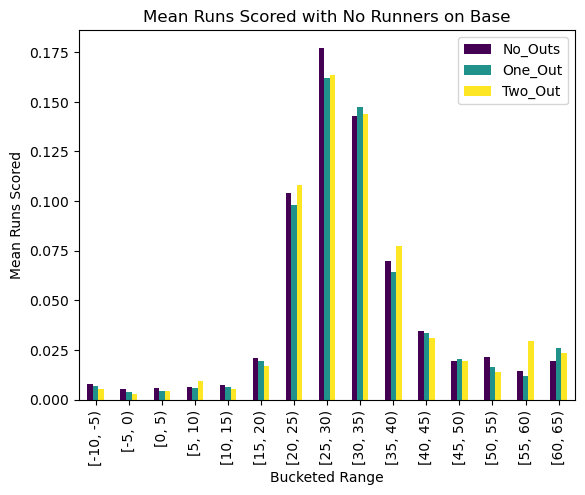

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_outs_power = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_out_power = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:22: FutureWarning: The default of observed=False is depreca

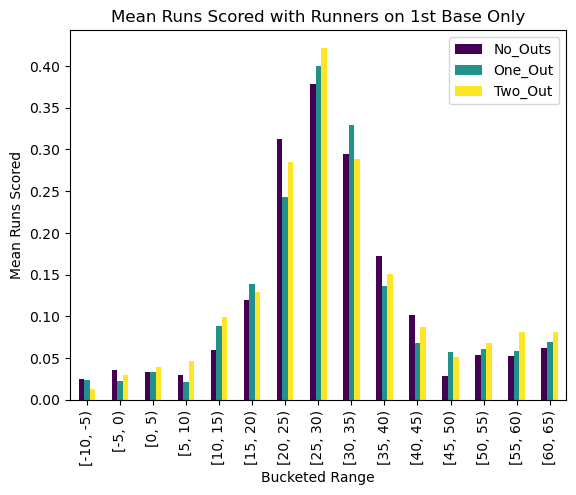

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_outs_power = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_out_power = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:22: FutureWarning: The default of observed=False is depreca

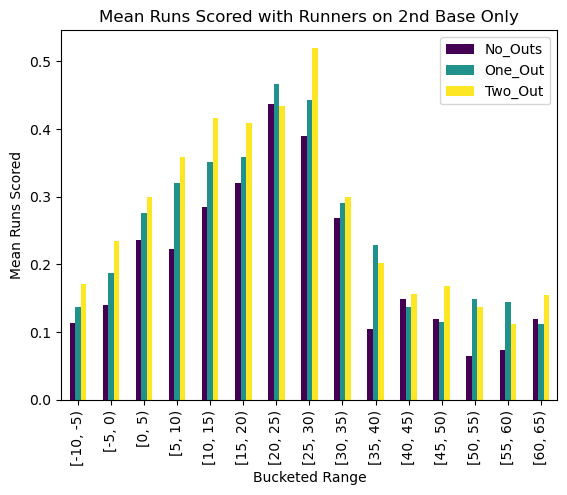

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_outs_power = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_out_power = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:22: FutureWarning: The default of observed=False is depreca

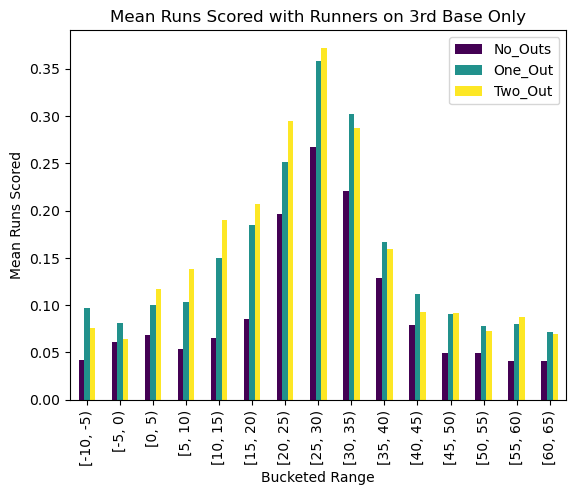

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_outs_power = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_out_power = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:22: FutureWarning: The default of observed=False is depreca

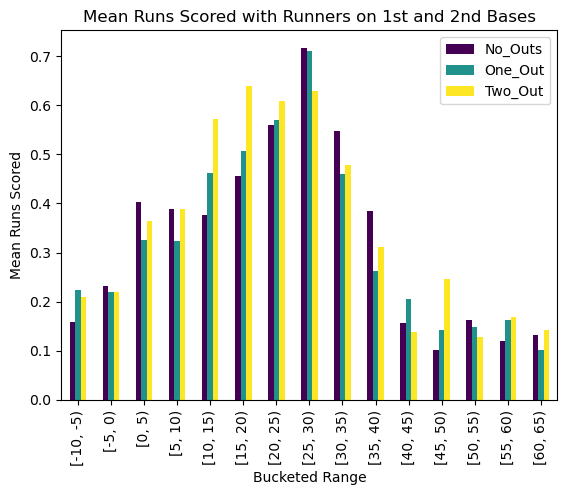

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_outs_power = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_out_power = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:22: FutureWarning: The default of observed=False is depreca

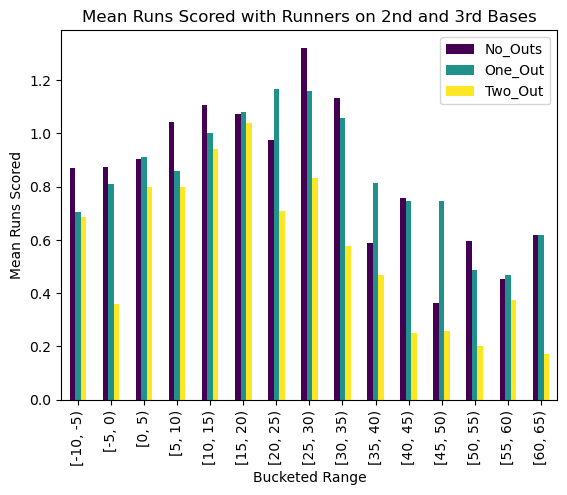

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_outs_power = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_out_power = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:22: FutureWarning: The default of observed=False is depreca

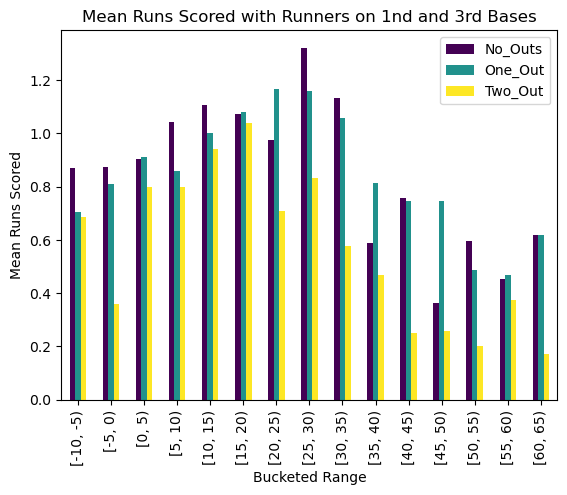

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_outs_power = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_out_power = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:22: FutureWarning: The default of observed=False is depreca

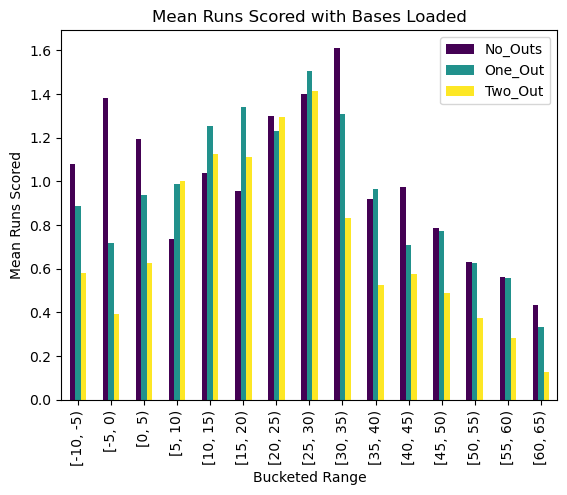

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_outs_power = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_out_power = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/2237981857.py:22: FutureWarning: The default of observed=False is depreca

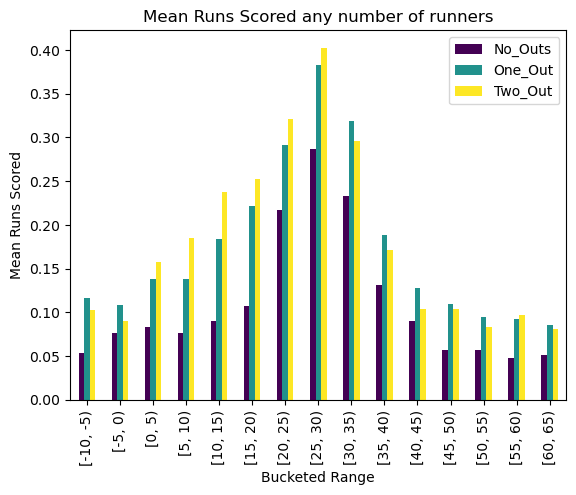

In [239]:

#let's try eliminating hrs

#combined = combined[combined["events"] != "home_run"]

combined_no_runners = combined[(combined["on_1b"] == 0) & ((combined["on_2b"]) == 0) & (combined["on_3b"] == 0)]
combined_1bonly = combined[(combined["on_1b"] == 1) & (combined["on_2b"] == 0) & (combined["on_3b"] == 0)]
combined_2bonly = combined[(combined["on_1b"] == 0) & (combined["on_2b"] == 1) & (combined["on_3b"]== 0)]
combined_3b_only = combined[(combined["on_1b"] == 0) & combined["on_2b"] == 0 & (combined["on_3b"]== 1)]
combined_1stand2nd = combined[(combined["on_1b"] == 1) & (combined["on_2b"] == 1) & (combined["on_3b"] == 0)]
combined_2ndand3rd = combined[(combined["on_1b"] == 0 )& (combined["on_2b"] == 1) & (combined["on_3b"] == 1)]
combined_1stand3rd = combined[(combined["on_1b"] == 1) & (combined["on_2b"] == 0 )& (combined["on_3b"] == 1)]
combined_basesloaded = combined[(combined["on_1b"] == 1) & (combined["on_2b"] == 1) & (combined["on_3b"] == 1)]





def plot_scenario(scenario_df, title):
    
    no_outs_power = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["Runs_Scored"].mean()
    one_out_power = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["Runs_Scored"].mean()
    two_out_power = scenario_df[scenario_df["outs_when_up"] == 2].groupby("bucketed_range")["Runs_Scored"].mean()
    no_outs_contact = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["Runs_Scored"].mean()
    one_out_contact = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["Runs_Scored"].mean()
    two_out_contact = scenario_df[scenario_df["outs_when_up"] == 2].groupby("bucketed_range")["Runs_Scored"].mean()

    combined_means = pd.DataFrame({
        'No_Outs': no_outs_power,
        'One_Out': one_out_power,
        'Two_Out': two_out_power,  
    })

    combined_means.plot(kind='bar', colormap='viridis')

    plt.xlabel('Bucketed Range')
    plt.ylabel('Mean Runs Scored')
    plt.title(title)
    plt.show()


plot_scenario(combined_no_runners, 'Mean Runs Scored with No Runners on Base')
plot_scenario(combined_1bonly, 'Mean Runs Scored with Runners on 1st Base Only')
plot_scenario(combined_2bonly, 'Mean Runs Scored with Runners on 2nd Base Only')
plot_scenario(combined_3b_only, 'Mean Runs Scored with Runners on 3rd Base Only')
plot_scenario(combined_1stand2nd, 'Mean Runs Scored with Runners on 1st and 2nd Bases')
plot_scenario(combined_2ndand3rd, 'Mean Runs Scored with Runners on 2nd and 3rd Bases')
plot_scenario(combined_2ndand3rd, 'Mean Runs Scored with Runners on 1nd and 3rd Bases')
plot_scenario(combined_basesloaded, 'Mean Runs Scored with Bases Loaded')
plot_scenario(combined, 'Mean Runs Scored any number of runners')

In [217]:

filtered_data = combined_2ndand3rd[(combined_2ndand3rd["launch_angle"] > 10) & (combined_2ndand3rd["launch_angle"] < 20)]

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_outs = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["number_bases"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_out = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["number_bases"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:17: FutureWarning: The default of observed=False is deprecated and will 

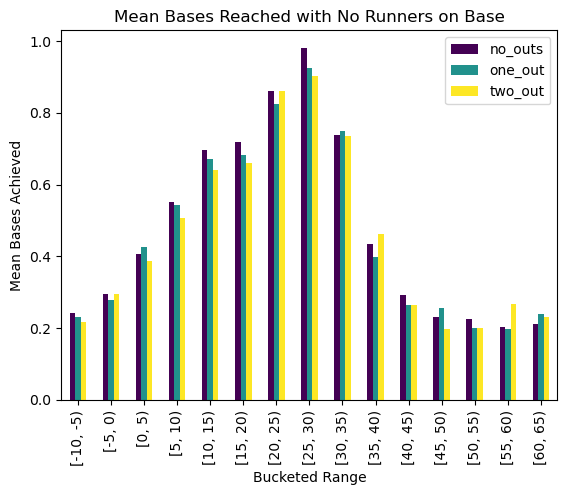

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_outs = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["number_bases"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_out = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["number_bases"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:17: FutureWarning: The default of observed=False is deprecated and will 

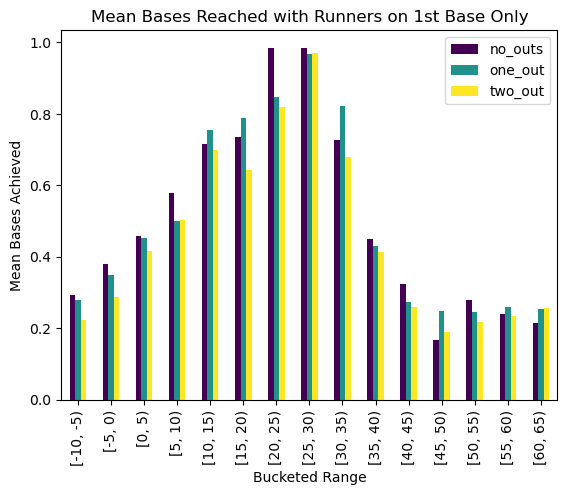

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_outs = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["number_bases"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_out = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["number_bases"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:17: FutureWarning: The default of observed=False is deprecated and will 

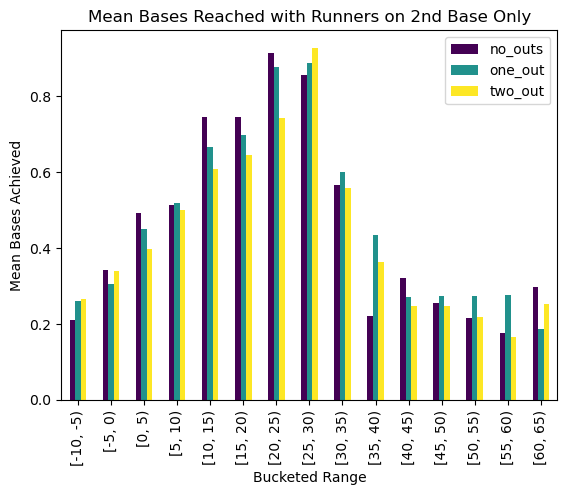

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_outs = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["number_bases"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_out = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["number_bases"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:17: FutureWarning: The default of observed=False is deprecated and will 

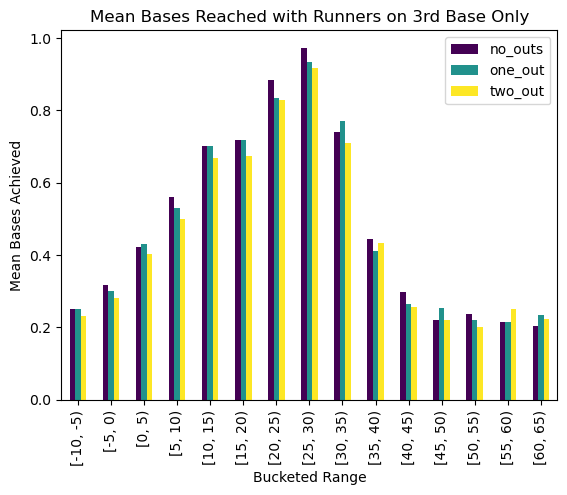

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_outs = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["number_bases"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_out = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["number_bases"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:17: FutureWarning: The default of observed=False is deprecated and will 

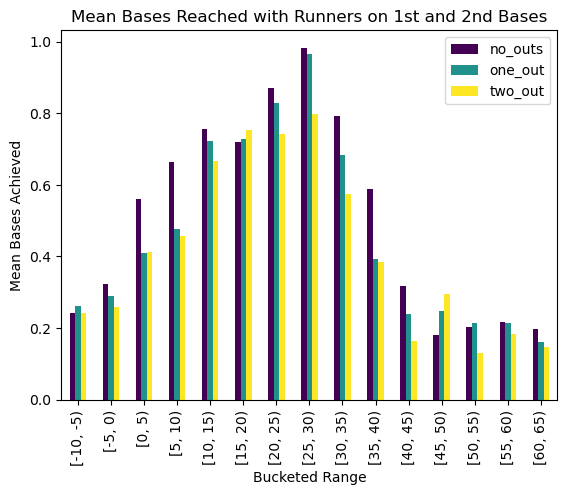

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_outs = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["number_bases"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_out = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["number_bases"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:17: FutureWarning: The default of observed=False is deprecated and will 

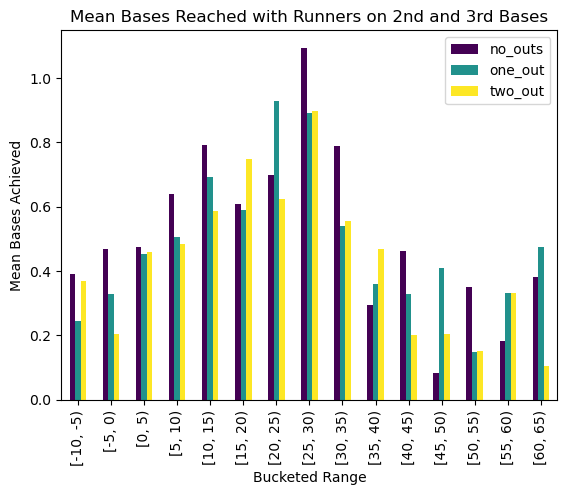

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_outs = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["number_bases"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_out = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["number_bases"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:17: FutureWarning: The default of observed=False is deprecated and will 

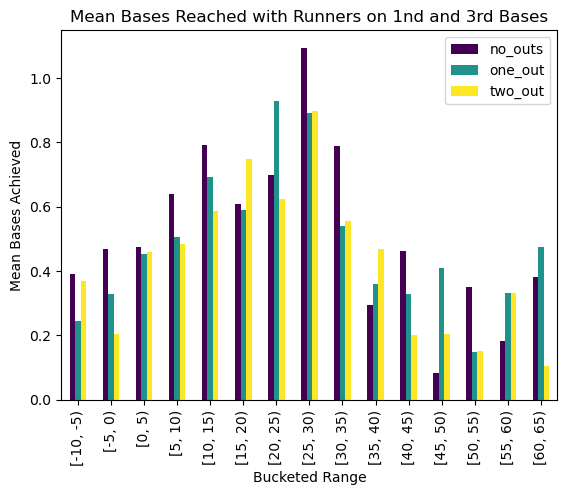

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_outs = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["number_bases"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  one_out = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["number_bases"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/135776063.py:17: FutureWarning: The default of observed=False is deprecated and will 

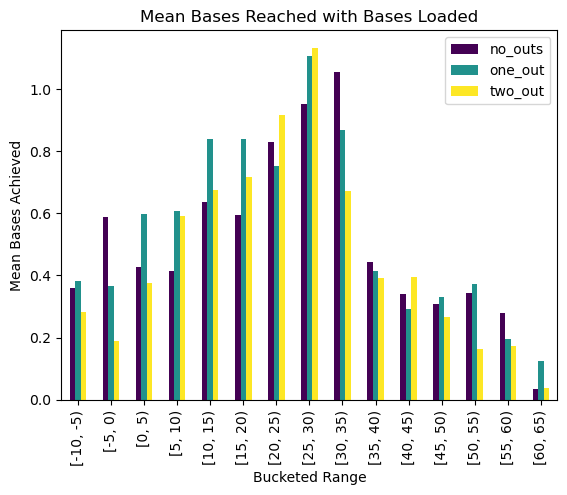

In [218]:

combined_no_runners = combined[(combined["on_1b"] == 0) & ((combined["on_2b"]) == 0) & (combined["on_3b"] == 0)]
combined_1bonly = combined[(combined["on_1b"] == 1) & (combined["on_2b"] == 0) & (combined["on_3b"] == 0)]
combined_2bonly = combined[(combined["on_1b"] == 0) & (combined["on_2b"] == 1) & (combined["on_3b"]== 0)]
combined_3b_only = combined[(combined["on_1b"] == 0) & combined["on_2b"] == 0 & (combined["on_3b"]== 1)]
combined_1stand2nd = combined[(combined["on_1b"] == 1) & (combined["on_2b"] == 1) & (combined["on_3b"] == 0)]
combined_2ndand3rd = combined[(combined["on_1b"] == 0 )& (combined["on_2b"] == 1) & (combined["on_3b"] == 1)]
combined_1stand3rd = combined[(combined["on_1b"] == 1) & (combined["on_2b"] == 0 )& (combined["on_3b"] == 1)]
combined_basesloaded = combined[(combined["on_1b"] == 1) & (combined["on_2b"] == 1) & (combined["on_3b"] == 1)]





def plot_scenario(scenario_df, title):
    no_outs = scenario_df[scenario_df["outs_when_up"] == 0].groupby("bucketed_range")["number_bases"].mean()
    one_out = scenario_df[scenario_df["outs_when_up"] == 1].groupby("bucketed_range")["number_bases"].mean()
    two_out = scenario_df[scenario_df["outs_when_up"] == 2].groupby("bucketed_range")["number_bases"].mean()
    

    combined_means = pd.DataFrame({
        'no_outs': no_outs,
        'one_out': one_out,
        'two_out': two_out
    })

    combined_means.plot(kind='bar', colormap='viridis')

    plt.xlabel('Bucketed Range')
    plt.ylabel('Mean Bases Achieved')
    plt.title(title)
    plt.show()


plot_scenario(combined_no_runners, 'Mean Bases Reached with No Runners on Base')
plot_scenario(combined_1bonly, 'Mean Bases Reached with Runners on 1st Base Only')
plot_scenario(combined_2bonly, 'Mean Bases Reached with Runners on 2nd Base Only')
plot_scenario(combined_3b_only, 'Mean Bases Reached with Runners on 3rd Base Only')
plot_scenario(combined_1stand2nd, 'Mean Bases Reached with Runners on 1st and 2nd Bases')
plot_scenario(combined_2ndand3rd, 'Mean Bases Reached with Runners on 2nd and 3rd Bases')
plot_scenario(combined_2ndand3rd, 'Mean Bases Reached with Runners on 1nd and 3rd Bases')
plot_scenario(combined_basesloaded, 'Mean Bases Reached with Bases Loaded')

/Users/ctol/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/ctol/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


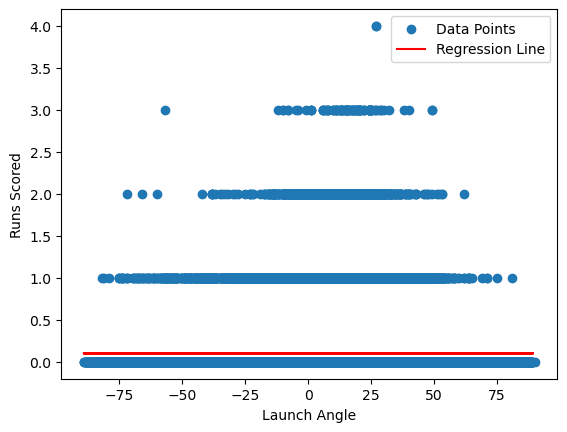

In [190]:
from sklearn.linear_model import LinearRegression
X = combined[['launch_angle']].notna()
y = combined['Runs_Scored']
X = X.values.reshape(-1, 1)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot the data points and the regression line
plt.scatter(combined['launch_angle'], combined['Runs_Scored'], label='Data Points')
plt.plot(combined['launch_angle'], predictions, color='red', label='Regression Line')
plt.xlabel('Launch Angle')
plt.ylabel('Runs Scored')
plt.legend()
plt.show()

In [242]:
x = combined['pitch_type'].value_counts().to_dict()
print(x)
combined.to_csv("combined_file_csv_whole.csv")


{'FF': 199000, 'SL': 112261, 'SI': 88754, 'CH': 66869, 'CU': 47849, 'FC': 38418, 'KC': 10912, 'FS': 9031, 'FA': 479, 'CS': 242, 'KN': 76, 'EP': 59}


/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/1722211111.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  power_means = scenario_df[scenario_df["PlayerType"] == "Power"].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/1722211111.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contact_means = scenario_df[scenario_df["PlayerType"] == "Contact"].groupby("bucketed_range")["Runs_Scored"].mean()


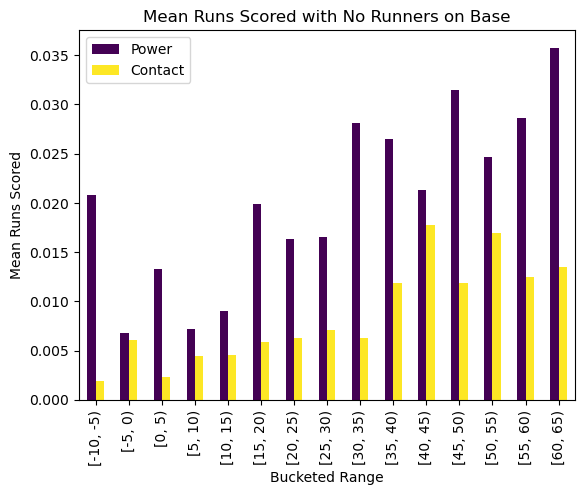

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/1722211111.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  power_means = scenario_df[scenario_df["PlayerType"] == "Power"].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/1722211111.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contact_means = scenario_df[scenario_df["PlayerType"] == "Contact"].groupby("bucketed_range")["Runs_Scored"].mean()


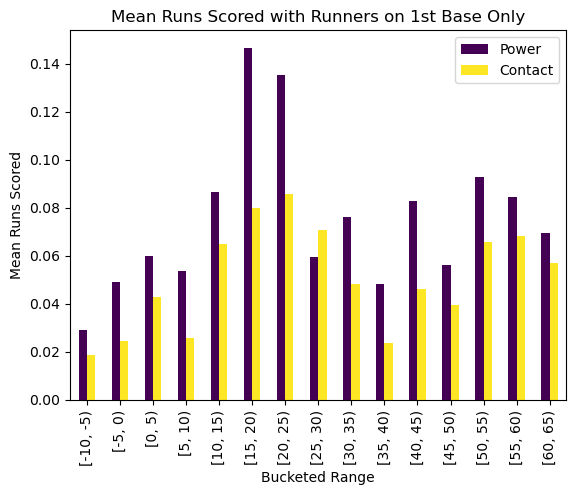

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/1722211111.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  power_means = scenario_df[scenario_df["PlayerType"] == "Power"].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/1722211111.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contact_means = scenario_df[scenario_df["PlayerType"] == "Contact"].groupby("bucketed_range")["Runs_Scored"].mean()


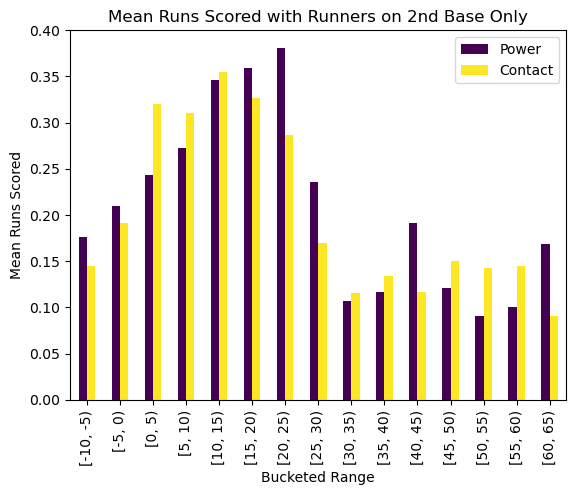

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/1722211111.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  power_means = scenario_df[scenario_df["PlayerType"] == "Power"].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/1722211111.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contact_means = scenario_df[scenario_df["PlayerType"] == "Contact"].groupby("bucketed_range")["Runs_Scored"].mean()


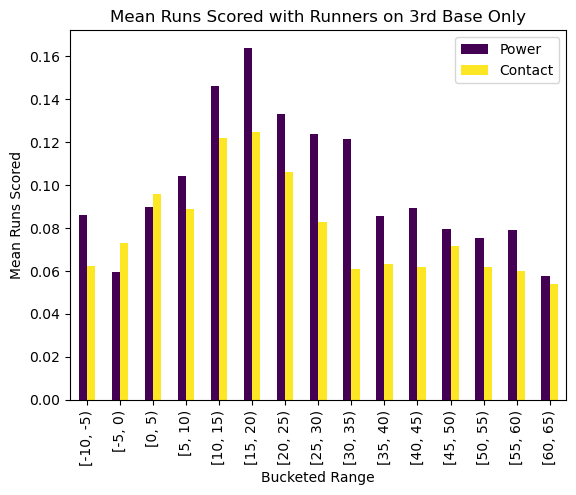

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/1722211111.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  power_means = scenario_df[scenario_df["PlayerType"] == "Power"].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/1722211111.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contact_means = scenario_df[scenario_df["PlayerType"] == "Contact"].groupby("bucketed_range")["Runs_Scored"].mean()


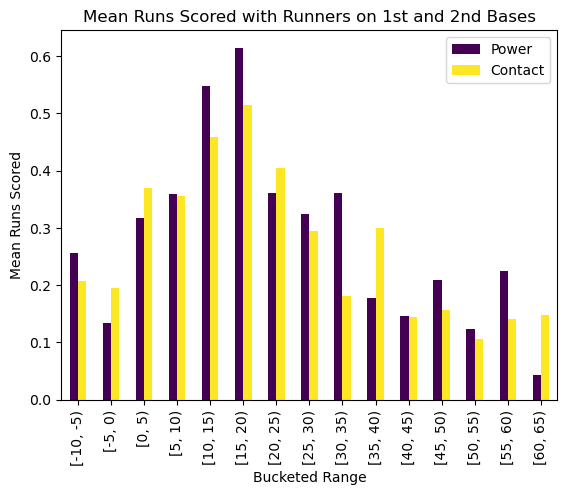

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/1722211111.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  power_means = scenario_df[scenario_df["PlayerType"] == "Power"].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/1722211111.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contact_means = scenario_df[scenario_df["PlayerType"] == "Contact"].groupby("bucketed_range")["Runs_Scored"].mean()


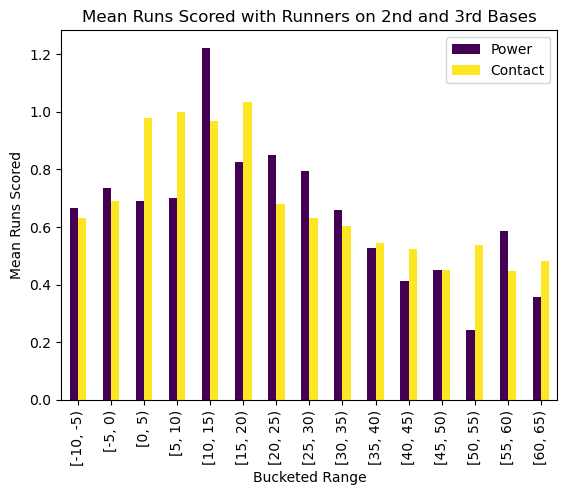

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/1722211111.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  power_means = scenario_df[scenario_df["PlayerType"] == "Power"].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/1722211111.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contact_means = scenario_df[scenario_df["PlayerType"] == "Contact"].groupby("bucketed_range")["Runs_Scored"].mean()


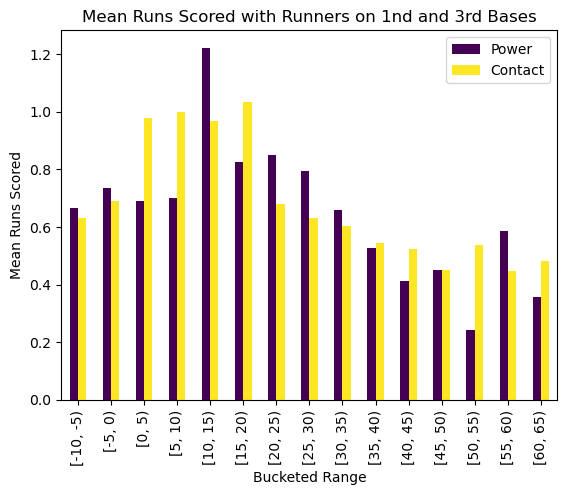

/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/1722211111.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  power_means = scenario_df[scenario_df["PlayerType"] == "Power"].groupby("bucketed_range")["Runs_Scored"].mean()
/var/folders/2m/mx05kz8s6m7cb02v4q40gf5m0000gn/T/ipykernel_85961/1722211111.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contact_means = scenario_df[scenario_df["PlayerType"] == "Contact"].groupby("bucketed_range")["Runs_Scored"].mean()


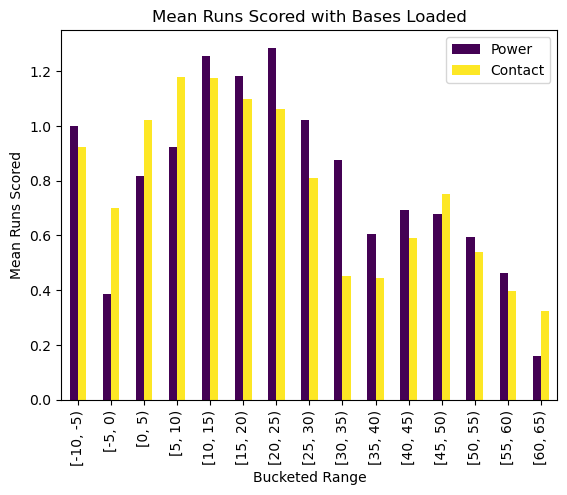

In [222]:
combined = combined[combined["events"] != "home_run"]



combined_no_runners = combined[(combined["on_1b"] == 0) & ((combined["on_2b"]) == 0) & (combined["on_3b"] == 0)]
combined_1bonly = combined[(combined["on_1b"] == 1) & (combined["on_2b"] == 0) & (combined["on_3b"] == 0)]
combined_2bonly = combined[(combined["on_1b"] == 0) & (combined["on_2b"] == 1) & (combined["on_3b"]== 0)]
combined_3b_only = combined[(combined["on_1b"] == 0) & combined["on_2b"] == 0 & (combined["on_3b"]== 1)]
combined_1stand2nd = combined[(combined["on_1b"] == 1) & (combined["on_2b"] == 1) & (combined["on_3b"] == 0)]
combined_2ndand3rd = combined[(combined["on_1b"] == 0 )& (combined["on_2b"] == 1) & (combined["on_3b"] == 1)]
combined_1stand3rd = combined[(combined["on_1b"] == 1) & (combined["on_2b"] == 0 )& (combined["on_3b"] == 1)]
combined_basesloaded = combined[(combined["on_1b"] == 1) & (combined["on_2b"] == 1) & (combined["on_3b"] == 1)]





def plot_scenario(scenario_df, title):
    power_means = scenario_df[scenario_df["PlayerType"] == "Power"].groupby("bucketed_range")["Runs_Scored"].mean()
    contact_means = scenario_df[scenario_df["PlayerType"] == "Contact"].groupby("bucketed_range")["Runs_Scored"].mean()

    combined_means = pd.DataFrame({
        'Power': power_means,
        'Contact': contact_means,
    })

    combined_means.plot(kind='bar', colormap='viridis')

    plt.xlabel('Bucketed Range')
    plt.ylabel('Mean Runs Scored')
    plt.title(title)
    plt.show()
plot_scenario(combined_no_runners, 'Mean Runs Scored with No Runners on Base')
plot_scenario(combined_1bonly, 'Mean Runs Scored with Runners on 1st Base Only')
plot_scenario(combined_2bonly, 'Mean Runs Scored with Runners on 2nd Base Only')
plot_scenario(combined_3b_only, 'Mean Runs Scored with Runners on 3rd Base Only')
plot_scenario(combined_1stand2nd, 'Mean Runs Scored with Runners on 1st and 2nd Bases')
plot_scenario(combined_2ndand3rd, 'Mean Runs Scored with Runners on 2nd and 3rd Bases')
plot_scenario(combined_2ndand3rd, 'Mean Runs Scored with Runners on 1nd and 3rd Bases')
plot_scenario(combined_basesloaded, 'Mean Runs Scored with Bases Loaded')